In this tutorial, you'll learn how to use R to describe your data, both numerically and visually.

Any time that you get a new dataset, one of the first tasks that you have to do is to find ways of
summarizing the data in a compact, easily understood fashion. This is what **descriptive statistics** (as
opposed to **inferential statistics**) is all about.

# Measures of descriptive statistics

In [2]:
# Let's use the these Student's Sleep data, included by R, for this demostration
?sleep

## Measures of tendency

### The mean

The mean of a set of observations is just an average, i.e., add all of the values up, and
then divide by the total number of values (N.B. ).

$<X> = \frac{X_1 + X_2 + \dots + X_N}{N} = \frac{1}{N}\sum_{i=1}^N X_i$

In [3]:
sum(sleep$extra)/length(sleep$extra)

[1] 1.54

However, R has a built-in function, `mean`, to compute this:

In [4]:
mean(sleep$extra)

[1] 1.54

### The median

The second measure of central tendency that people use a lot is the median, and it’s even easier to
describe than the mean. The median of a set of observations is just the middle value.

In [5]:
sort(sleep$extra[-length(sleep$extra)])

[1] -1.6 -1.2 -0.2 -0.1 -0.1  0.0  0.1  0.7  0.8  0.8  1.1  1.6  1.9  2.0  3.4
[16]  3.7  4.4  4.6  5.5

Here there are 19 observations, so the value in the middle is the tenth one, i.e. 0.8. Therefore, in contrast to the mean in a dataset, the median many times will correspond to an observed value in our datasets.

The aforementioned example occurs in the case of datasets with an odd number of observations. What would happen if we had used the 20 observations?

In [6]:
sort(sleep$extra)

[1] -1.6 -1.2 -0.2 -0.1 -0.1  0.0  0.1  0.7  0.8  0.8  1.1  1.6  1.9  2.0  3.4
[16]  3.4  3.7  4.4  4.6  5.5

The middle points would correspond to both tenth and eleven positions. In this case, the median would correspond to the average between these two values, i.e. (0.8 + 1.1)/2 = 0.95

Again, in order not do these things manually every time, R provides a built-in function called `median`, which essentially sorts the input values and takes the corresponding middle point.

In [8]:
median(sleep$extra[-length(sleep$extra)])

median(sleep$extra)

[1] 0.8

[1] 0.95

### Trimmed mean

Something that you will often find when working with data is that these are messy and sometimes, noisy. 

For example, let's replace the first element of our data with a value that looks suspicious compared to the rest of the values. 

In [10]:
extra_noisy<-sleep$extra
extra_noisy[1]<-1000
extra_noisy

[1] 1000.0   -1.6   -0.2   -1.2   -0.1    3.4    3.7    0.8    0.0    2.0
[11]    1.9    0.8    1.1    0.1   -0.1    4.4    5.5    1.6    4.6    3.4

This is an example of an **outlier**, a value that does not appear to belong with the others. Many times, in examples as clear as this it is reasonable to remove this point from the data. However, in real life one does not always get such cut-and-dried examples. For instance, you might get this instead:

In [11]:
extra_noisy[1]<- -20
extra_noisy[length(extra_noisy)]<- 18
extra_noisy

[1] -20.0  -1.6  -0.2  -1.2  -0.1   3.4   3.7   0.8   0.0   2.0   1.9   0.8
[13]   1.1   0.1  -0.1   4.4   5.5   1.6   4.6  18.0

Here, -20 and 18 look both suspicious, but it's harder to say whether these values are legitimate or not.

When faced with a situation where some of the most extreme-valued observations might not be quite
trustworthy, the mean is not necessarily a good measure of central tendency. It is highly sensitive to extreme values, and thus, is not considered a **robust** measure. 

One general solution would be to use a "trimmed mean", that is, a mean calculated discarding the most extreme examples on both ends (e.g., the largest and the smallest). The goal is to preserve the best characteristics of the mean while not being highly influenced by extreme outliers.

For example, let's say we are to calculate the 5% trimmed mean. In our example, this would correspond to discarding the largest 5%  and the smallest 5% of the observations, and then takes the mean of the remaining 90% of the observations.

In [12]:
mean(extra_noisy[c(2:(length(extra_noisy)-1))])

[1] 1.483333

Now, compare this mean to the one using all the observations:

In [13]:
mean(extra_noisy)

[1] 1.235

There's a difference, right? 

As usual, to make our lifes easier, R allows you to specify the amount of trimming when calling the function `mean`. Let's look at this using the help (by prepending `?` operator or using `help`) :

In [14]:
?mean

In [15]:
mean(extra_noisy, trim=0.05)

[1] 1.483333

<div class="alert alert-info"> <b> Question:</b> We are talking about outliers, but do you think the median would be also a robust measure against outliers? </div>

### Mode

The mode of a sample is very simple: it is the value that occurs most frequently. In this case, R does not have a built-in function for this. You'll create one in the assigments (extra credit; it can be challending, I know!)

## Measures of variability

### Variance

The formula for the variance is the following:

$s^2 = \frac{1}{N}\sum_{i=1}^N (X_i - <X>)^2$

In [16]:
# Lets do it
mean.sleep.extra<-mean(sleep$extra)
N<-length(sleep$extra)
sum((sleep$extra - mean.sleep.extra)**2)/N

[1] 3.8684

Fortunately, R has a built-in function for calculating this, `var` :

In [17]:
var(sleep$extra)

[1] 4.072

Ohhh, what happened?? What R is actually calculating is a slightly different formula, which implies dividing by N-1 instead that N. Let's see this:

In [18]:
sum((sleep$extra - mean.sleep.extra)**2)/(N-1)

[1] 4.072

**WHY??** We'll see this in a near future...

### Standard Deviation

The Standard Deviation, also called the “root mean squared deviation” or RMSD, is the square root of the variance, and it aims at providing information about the dispersion of the data in their same units:

$s = \sqrt{\frac{1}{N}\sum_{i=1}^N (X_i - <X>)^2}$

We could calculate this manually, but again (and thankfully), R has a built-in function for doing this, `sd`

In [19]:
sd(sleep$extra)

[1] 2.01792

### Average Absolute Devation (AAD)

R does not have a built-in function for this, so you either create one yourself, or make use of a very useful library called **lsr**, which has this function implemented.

In [20]:
library(lsr)

In [21]:
mean(abs(sleep$extra - mean(sleep$extra)))

[1] 1.664

In [22]:
aad(sleep$extra)

[1] 1.664

### Median Absolute Deviaton (MAD)

In [23]:
median(abs(sleep$extra - median(sleep$extra)))

[1] 1.05

R has a built-in function for this: `mad`

In [24]:
mad(sleep$extra, constant = 1)
#we had to set constant argument to 1 to get the expected behaviour. Why? Look at the documentation for details.

[1] 1.05

### Range

This is just the maximum minus the minimum, so it's very easy to compute using the R built-in functions `max` and `min`.

In [25]:
max( sleep$extra ) - min( sleep$extra )

[1] 7.1

You can compute the same from the R built-in function `range` :

In [26]:
range( sleep$extra )

[1] -1.6  5.5

### Interquartile range (IQR)

IQR is the difference between the 25th and the 75th quantile. What is a quantile? We'll learn this in more detail later in the course.

In [29]:
quantile( x = sleep$extra, probs = c(.25, .75))

25%    75% 
-0.025  3.400

Again, R has a built-in function `IQR` to make your life easier :-)

In [30]:
IQR(sleep$extra)

[1] 3.425

# Measures of shape

$skewness(X) =  \frac{1}{N\hat{\sigma}^3}\sum_{i=1}^N(X-<X_i>)^3$

$kurtosis(X) =  \frac{1}{N\hat{\sigma}^4}\sum_{i=1}^N(X-<X_i>)^4 -3$

These less often used, but in case you want to calculate them, you can do this by using the library **psych**, which is another useful package:

In [31]:
# Install this
library(psych)

In [32]:
# Skewness
skew(sleep$extra)

# Kurtosis
kurtosi(sleep$extra)

[1] 0.3863381

[1] -1.08659

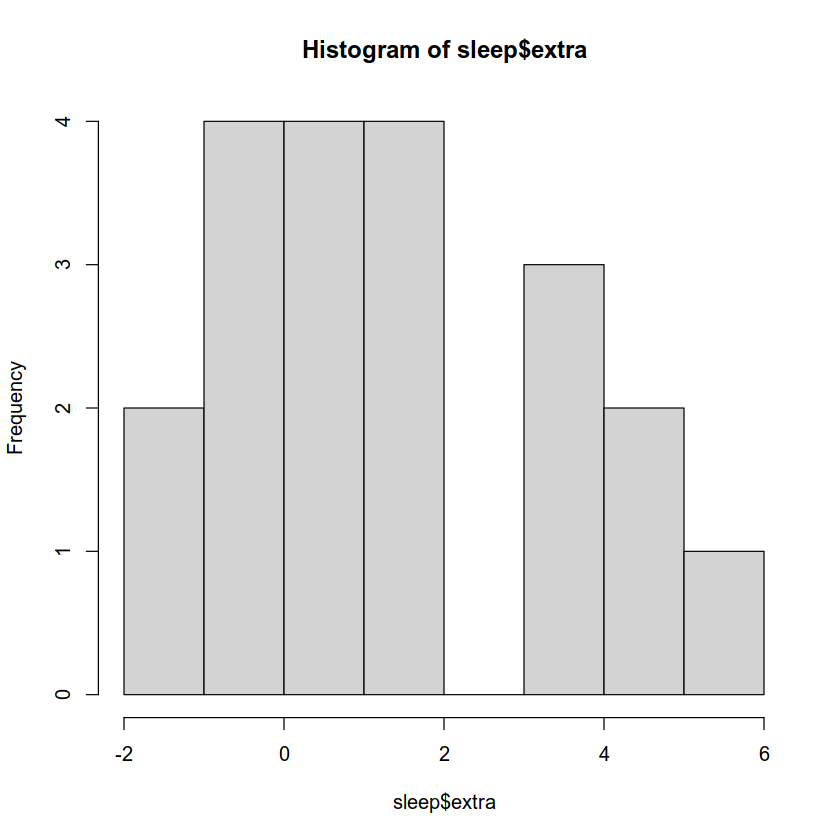

In [33]:
hist(sleep$extra)

# Descriptive statistics by means of summarizing your data

As we said earlier, descriptive statistics is about compressing the data just to give some relevant information about them. You can do this by summarizing them. Basically, you'll want to show a subset of the measures that we have just seen in a very compact and clean way.

In [34]:
# Let's use these ACT data again for this section
sat.dat<-read.csv("https://vincentarelbundock.github.io/Rdatasets/csv/psych/sat.act.csv")
sat.dat$gender<- as.factor( sat.dat$gender )
sat.dat$education<- as.factor( sat.dat$education )

### `summary` 
This is a built-in R function, which prints out some useful descriptive information. It can accept a vector or a data frame.

- If a **continous** variable, It gives us the minimum and maximum values (i.e., the range), the first and third quartiles (i.e. the IQR), the mean and the median.

In [35]:
summary( sat.dat$ACT )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.00   25.00   29.00   28.55   32.00   36.00 

- If a **logical** variable, it gives the number of Trues and Falses:

In [56]:
summary( sat.dat$ACT>29 )

   Mode   FALSE    TRUE 
logical     367     333 

- If a **factor** variable, it gives the number of occurrences by each factor:

In [81]:
summary(sat.dat$education)
summary(sat.dat$gender)

0   1   2   3   4   5 
 57  45  44 275 138 141

1   2 
247 453

**N.B.** This could also be obtained using the function `table`

In [58]:
table(sat.dat$education)


  0   1   2   3   4   5 
 57  45  44 275 138 141 

Here we are using all the time a vector, but as mentioned before, you can also pass a dataframe to `summary`. In this case, the same summary that we've just seen is generated but for every single column in the dataframe:

In [36]:
summary(sat.dat)

       X         gender  education      age             ACT       
 Min.   :29442   1:247   0: 57     Min.   :13.00   Min.   : 3.00  
 1st Qu.:32117   2:453   1: 45     1st Qu.:19.00   1st Qu.:25.00  
 Median :34896           2: 44     Median :22.00   Median :29.00  
 Mean   :34731           3:275     Mean   :25.59   Mean   :28.55  
 3rd Qu.:37250           4:138     3rd Qu.:29.00   3rd Qu.:32.00  
 Max.   :39985           5:141     Max.   :65.00   Max.   :36.00  
                                                                  
      SATV            SATQ      
 Min.   :200.0   Min.   :200.0  
 1st Qu.:550.0   1st Qu.:530.0  
 Median :620.0   Median :620.0  
 Mean   :612.2   Mean   :610.2  
 3rd Qu.:700.0   3rd Qu.:700.0  
 Max.   :800.0   Max.   :800.0  
                 NA's   :13     

### `describe` 
This function is contained in the **psych** library, and basically yields a data frame with most of the relevant statistics that we have studied:

- item name
- item number
- number of valid cases
- mean
- standard deviation
- trimmed mean (with trim defaulting to .1)
- median (standard or interpolated
- mad: median absolute deviation (from the median).
- minimum
- maximum
- skew
- kurtosis
- standard error

In [37]:
describe(sat.dat)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X,1,700,34731.085714,3026.8700206,34896,34739.841071,3809.5407,29442,39985,10543,-0.04625483,-1.18853714,114.40493322
gender*,2,700,1.647143,0.4782004,2,1.683929,0.0000,1,2,1,-0.61452329,-1.62467597,0.01807428
education*,3,700,4.164286,1.4253515,4,4.307143,1.4826,1,6,5,-0.68079989,-0.07489124,0.05387322
age,4,700,25.594286,9.4986466,22,23.862500,5.9304,13,65,52,1.64305735,2.42430535,0.35901510
ACT,5,700,28.547143,4.8235599,29,28.842857,4.4478,3,36,33,-0.65640259,0.53496913,0.18231343
SATV,6,700,612.234286,112.9025659,620,619.453571,118.6080,200,800,600,-0.64381115,0.32519458,4.26731588
SATQ,7,687,610.216885,115.6392972,620,617.254083,118.6080,200,800,600,-0.59292125,-0.01776025,4.41191437


**N.B.** Here the asterisk denotes a factor variable. For this kind of variables this information here is not useful, so we should ignore it

### `describeBy` 

This function is also contained in the **psych** and yields the same output of `describe`, but separated for a given group (factor) variable.

In [38]:
describeBy(x = sat.dat$ACT, group = sat.dat$gender)


 Descriptive statistics by group 
group: 1
   vars   n  mean   sd median trimmed  mad min max range  skew kurtosis   se
X1    1 247 28.79 5.06     30   29.23 4.45   3  36    33 -1.06     1.89 0.32
------------------------------------------------------------ 
group: 2
   vars   n  mean   sd median trimmed  mad min max range  skew kurtosis   se
X1    1 453 28.42 4.69     29   28.63 4.45  15  36    21 -0.39    -0.42 0.22

In [39]:
describeBy(x = sat.dat$ACT, group = sat.dat$education)


 Descriptive statistics by group 
group: 0
   vars  n  mean   sd median trimmed  mad min max range skew kurtosis   se
X1    1 57 27.47 5.21     28   27.53 5.93  15  36    21 -0.1    -0.85 0.69
------------------------------------------------------------ 
group: 1
   vars  n  mean   sd median trimmed  mad min max range  skew kurtosis  se
X1    1 45 27.49 6.06     27   27.84 7.41  15  36    21 -0.39    -0.94 0.9
------------------------------------------------------------ 
group: 2
   vars  n  mean   sd median trimmed  mad min max range  skew kurtosis   se
X1    1 44 26.98 5.81     28   27.53 4.45   3  36    33 -1.63     4.59 0.88
------------------------------------------------------------ 
group: 3
   vars   n  mean   sd median trimmed  mad min max range  skew kurtosis   se
X1    1 275 28.29 4.85     29   28.56 4.45  16  36    20 -0.46     -0.6 0.29
------------------------------------------------------------ 
group: 4
   vars   n  mean   sd median trimmed  mad min max range  skew kur

**N.B.** You can also do this in a more flexible way with the library **dplyr**. We will see this in the next tutorial (it'll be super cool!)

### `summarise` 

The last three functions that we have seen allow you to summarize very important information for describing the data. However, they yield a very specific output. How could we choose which output to summarize? We can do this with `summarise` function, which is part of the **tidyverse** library.

In [40]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::%+%()   masks psych::%+%()
✖ ggplot2::alpha() masks psych::alpha()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()


In [41]:
summarise(sat.dat, 
          mu = mean(ACT), 
          pop_med = median(ACT), 
          sigma = sd(ACT), 
          pop_iqr = IQR(ACT),
          pop_min = min(ACT), 
          pop_max = max(ACT),
          pop_q1 = quantile(ACT, 0.25),  # first quartile, 25th quantile
          pop_q3 = quantile(ACT, 0.75))  # third quartile, 75th quantile

mu,pop_med,sigma,pop_iqr,pop_min,pop_max,pop_q1,pop_q3
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
28.54714,29,4.82356,7,3,36,25,32


**N.B.** This function `summarise` is even more flexible than this. We will see in the next tutorial the cool things that you can do with it!

# Descriptive statistics by means of visualization

Ok, so we have already seen what measures we can use to describe our data, and how to calculate these in R using several functions. 

However, although numbers are really appealing and at some point you will probably end up showing summary tables in your future research projects, it is also recommended to display these results as graphs. 

We are going to see here how to do this using **ggplot**, a library whose basics we have already studied. This is just an introduction of the things that you can do. Here **curiosity** and **creativity** are essential!

In [43]:
library(tidyverse)

One nice way of visualizing your descriptive statistics is by using **BOXPLOTS**. Boxplots are a kind of graphs that basically displays in boxes the tendency (the median) and spread (the IQR, maximum and minimum) in one or more groups.

In order to generate boxplots using **ggplot**, you can make use of the function `geom_boxplot`.

<div class="alert alert-info"> <b> Practice:</b> Try it yourself with the ACT data, using "education" as the x variable, and "ACT" in the y variable in the aesthetics mappings  </div>

In [44]:
#YOUR CODE HERE

<div class="alert alert-info"> <b> Question </b>: What if you make a boxplot but with SATV in the x-axis   instead of education? </div>

Warning message:
“Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?”


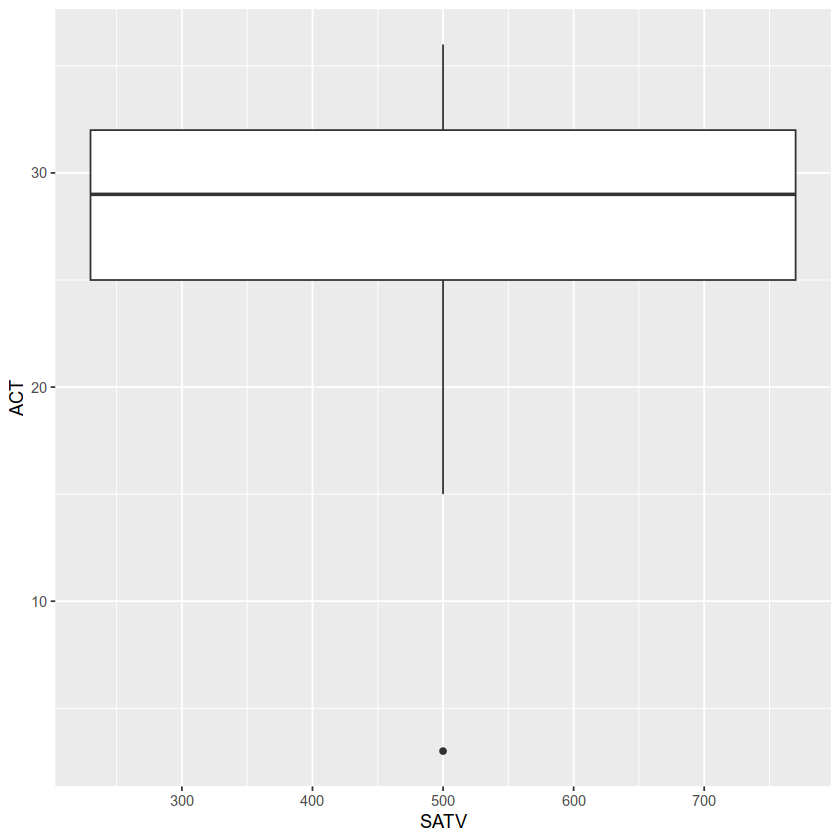

In [46]:
ggplot(data = sat.dat, mapping = aes(x=SATV, y=ACT)) + geom_boxplot()

Now, a cool way of depicting the shape of the data is by using **VIOLINPLOTS**. These plots are similar to boxplots, although they show the probability density of the data at different values. Typically, these plots are shown in addition to boxplots. In ggplot, this kind of plots can be rendered using the function `geom_violin` .

<div class="alert alert-info"> <b> Practice:</b> Add to the previous graph a layer with the function `geom_violin` </div> 

**N.B.** Remember that layers are shown on top of previous ones. Sometimes you may need to play with the order of the layers or with the aesthetics in order to make the final graph more appealing.

<div class="alert alert-info"> <b>(HOME) Practice</b> : Things are getting more and more prettier, right? Take a couple of minutes to make your graph visually more appealing. You could play around with the colors, the width of the boxplots, transparencies... Take a look at the documenation of the function that we've just used and have fun!</div>

Another nice way of summarizing your data visually is by using the function `stat_summary` from ggplot. Let's have look at its documentation.

In [51]:
?stat_summary

<div class="alert alert-info"> <b>Practice</b>: Try it yourself replacing geom_boxplot with stat_summary in the first graph that you made (i.e. the one showing ACT versus education) </div>

In [55]:
# ggplot(data = sat.dat, mapping = aes(x = education, y = ACT)) + YOUR CODE